In [ ]:
pip install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import random

In [ ]:
# Carregamento dos dados e suas informações
wine_df = pd.read_csv('winequality-red.csv')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
values= scaler.fit_transform(wine_df)
wine_df= pd.DataFrame(values,columns=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


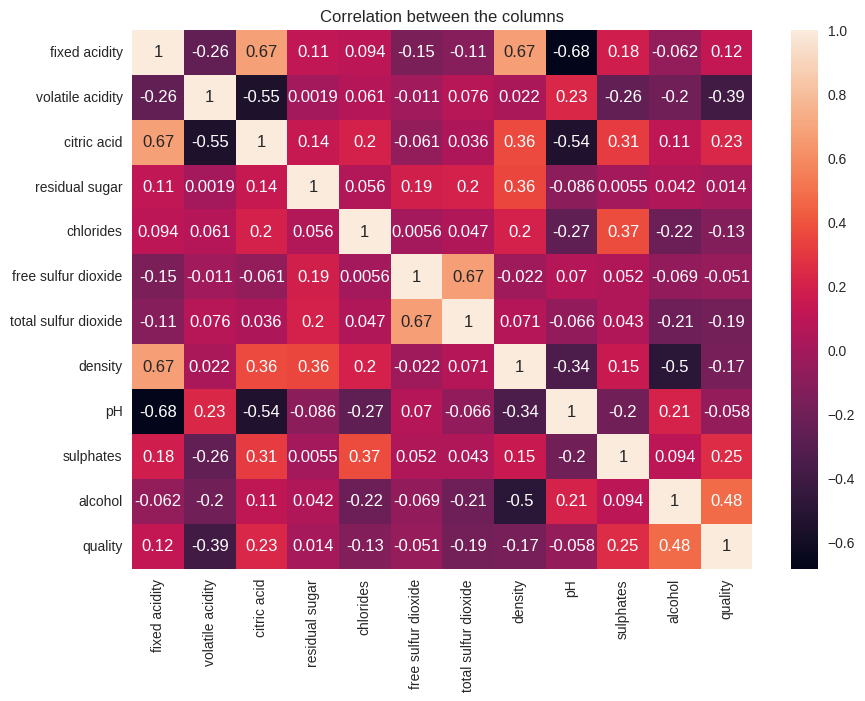

In [ ]:
# Geracao o heatmap das correlações entre as colunas do DataFrame wine_df
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

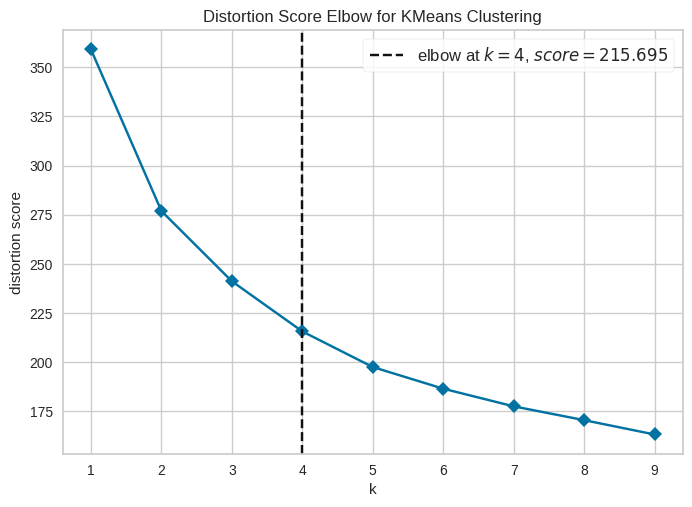

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Visualizacao do Elbow Method) e determinacao o número ótimo de clusters para o algoritmo KMeans.
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings = False)
visualizer.fit(wine_df)
visualizer.show()

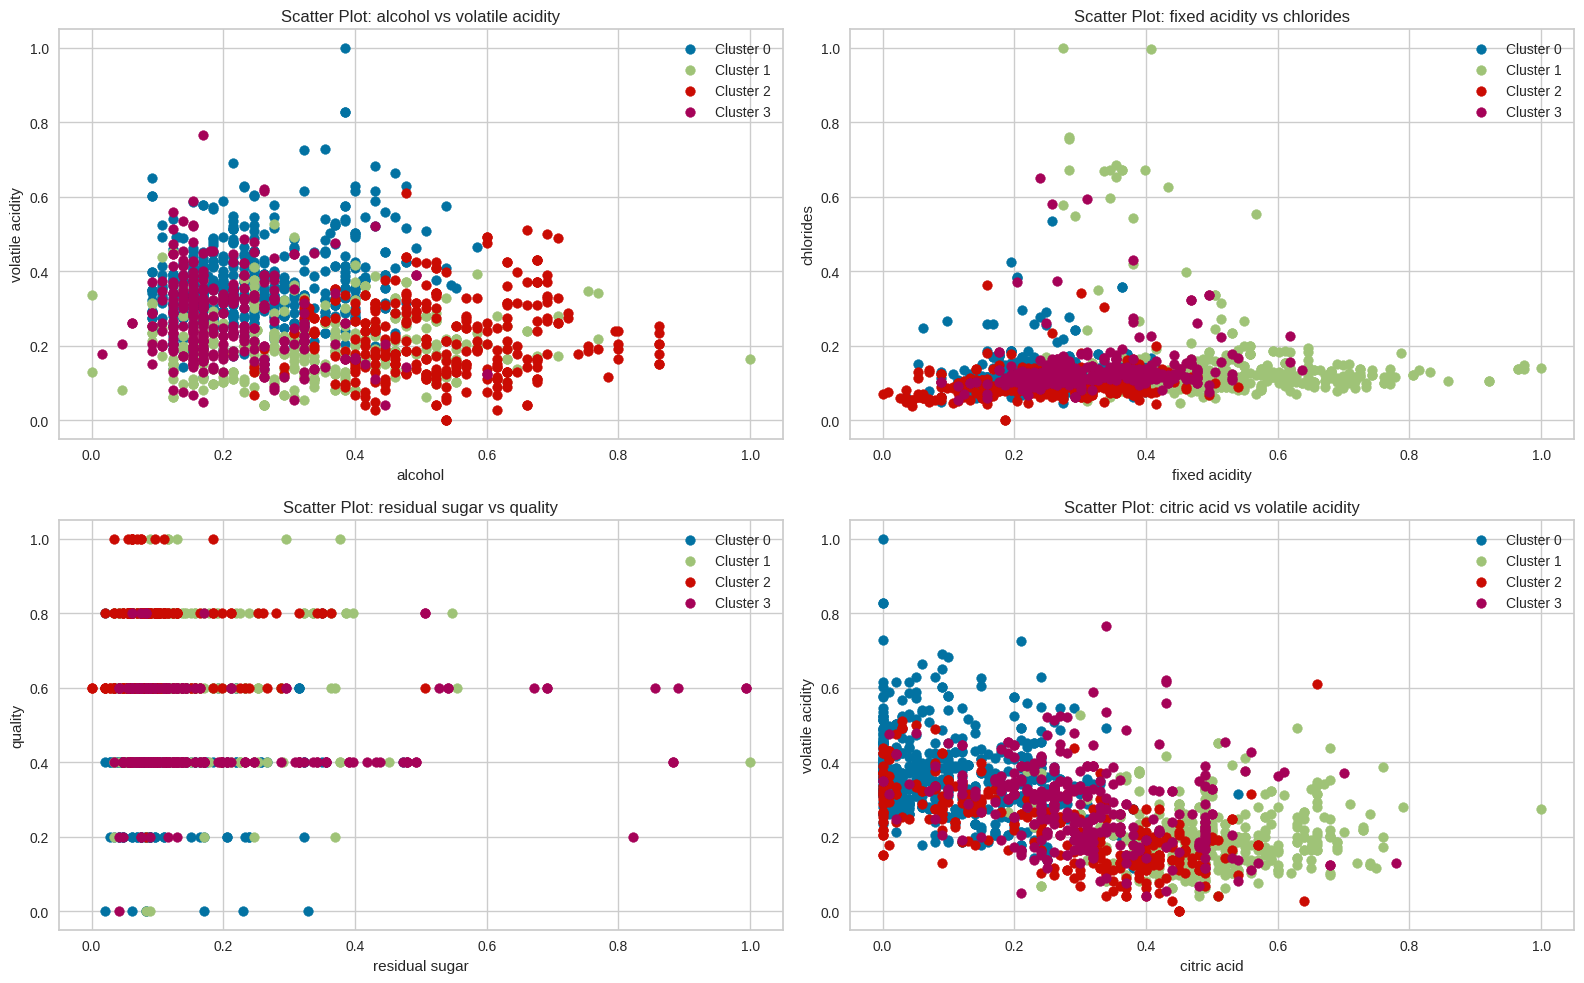

In [ ]:
kmeans= KMeans(n_clusters=4)
wine_matrix= wine_df.values
label= kmeans.fit_predict(wine_matrix)
unique_labels= np.unique(label)


num_plots = 4  # Número de gráficos de dispersão a serem gerados
num_attributes = 12  # Número total de atributos
random.seed(42)  # Definir semente aleatória para reprodução

plt.figure(figsize=(16, 10))  # Tamanho da figura ajustável

for plot_idx in range(num_plots):
    # Escolher aleatoriamente dois índices de atributos diferentes
    attr1, attr2 = random.sample(range(num_attributes), 2)

    plt.subplot(2, 2, plot_idx + 1)

    for i in unique_labels:
        plt.scatter(wine_matrix[label==i, attr1], wine_matrix[label==i, attr2], label=f'Cluster {i}')

    plt.xlabel(f'{wine_df.columns[attr1]}')
    plt.ylabel(f'{wine_df.columns[attr2]}')
    plt.title(f'Scatter Plot: {wine_df.columns[attr1]} vs {wine_df.columns[attr2]}')
    plt.legend()

plt.tight_layout()
plt.show()

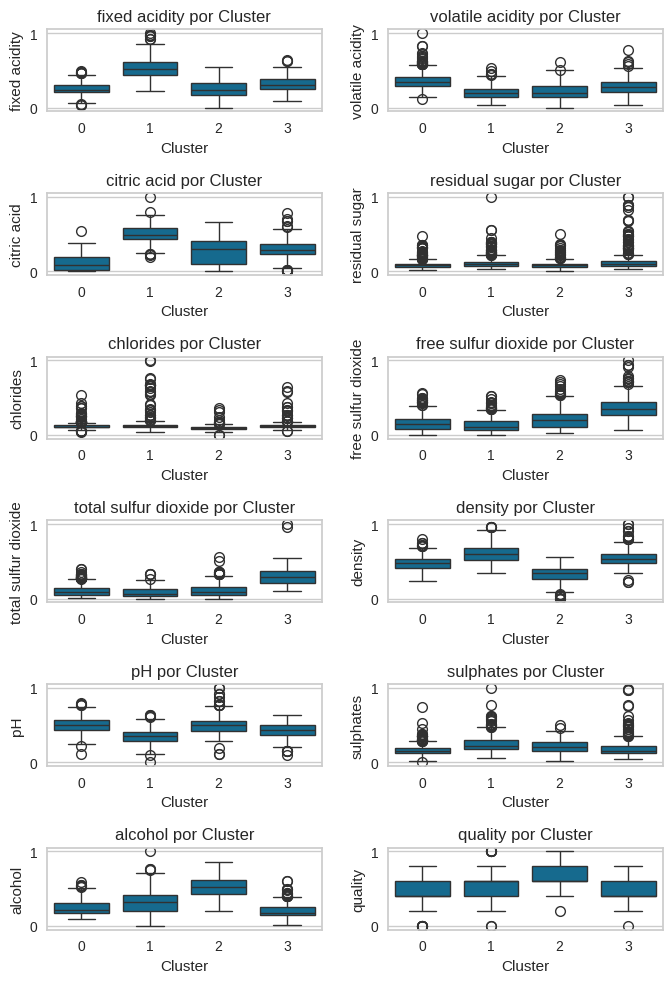

In [ ]:
# Adicionar 'label' como uma coluna ao DataFrame
wine_df['label'] = label

# Plotar boxplots para cada atributo por cluster
plt.figure(figsize=(7, 10))
for i, col in enumerate(wine_df.columns[:-1]):  # Excluir a coluna 'label' da iteração
    plt.subplot(6, 2, i + 1)  # 4 linhas, 3 colunas, posição atual
    sns.boxplot(x='label', y=col, data=wine_df)
    plt.title(f'{col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

wine_df = wine_df.drop(labels=['label'], axis=1)

In [ ]:

# Determinacao do numero ótimo de clusters por meio do Silhouette Method
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df, kmeans.labels_)
  print("For cluster: {}, the silhouette score is {} ".format(i, score))

For cluster: 2, the silhouette score is 0.23424795519019972 
For cluster: 3, the silhouette score is 0.2049032517397477 
For cluster: 4, the silhouette score is 0.18828933080241597 
For cluster: 5, the silhouette score is 0.1802629783323214 
For cluster: 6, the silhouette score is 0.1902105730321653 
For cluster: 7, the silhouette score is 0.1519855088366179 
For cluster: 8, the silhouette score is 0.14570664779402148 
For cluster: 9, the silhouette score is 0.15054742438106353 


Text(0, 0.5, 'Silhouette coefficient')

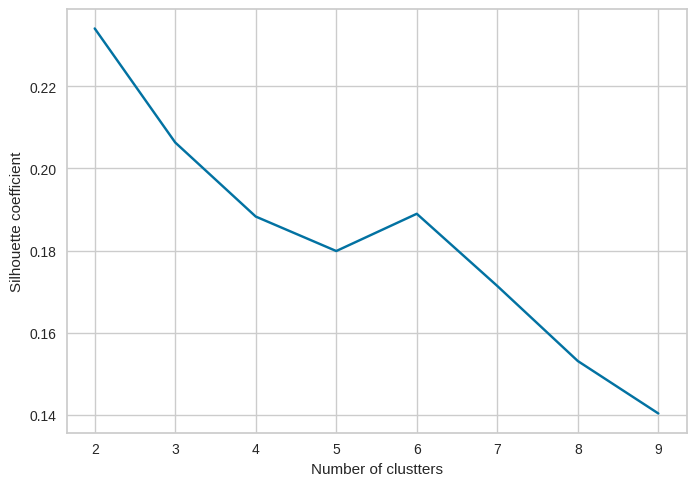

In [ ]:
# Analise grafica do Silhouette Method
silhouette_coeficients = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(wine_df)
  score = silhouette_score(wine_df, kmeans.labels_)
  silhouette_coeficients.append(score)

plt.plot(range(2,10), silhouette_coeficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of clustters")
plt.ylabel("Silhouette coefficient")


0.9606464076035265


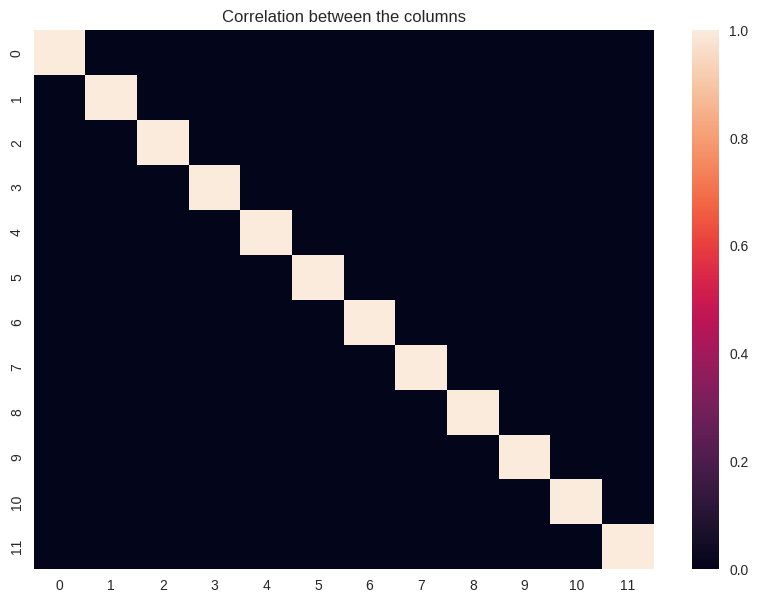

Autovalores (variância explicada por cada componente):
[0.07225939 0.04912583 0.03022584 0.0154323  0.01417395 0.01048424
 0.01024632 0.00742985 0.00647314 0.00477781 0.0028985  0.00116619]

Matriz de Carga (Component Loadings):
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.498377         -0.245521     0.665602        0.066288   0.060950   
1       -0.128708         -0.213490     0.074862       -0.055737  -0.089614   
2       -0.144625         -0.132855     0.137800        0.148591   0.011119   
3        0.186508          0.202609    -0.437210        0.201975  -0.054257   
4        0.283306          0.415216    -0.000420        0.395732  -0.130255   
5       -0.337003         -0.113067     0.178349        0.335635   0.250765   
6        0.045004          0.476365    -0.096434       -0.155542   0.440575   
7       -0.360808          0.128655     0.145548        0.603361   0.162629   
8       -0.084719          0.536460     0.438086       -0.39

In [ ]:

pca= PCA()
X= pca.fit_transform(wine_df)
print(sum(pca.explained_variance_[0:9])/sum(pca.explained_variance_))
pca_df = pd.DataFrame(X)

plt.figure(figsize=(10,7))
sns.heatmap(pca_df.corr())
plt.title('Correlation between the columns')
plt.show()

# Obter os autovalores
autovalores = pca.explained_variance_

# Obter os autovetores
autovetores = pca.components_

# Criar um DataFrame para os autovetores (component loadings)
loading_matrix = pd.DataFrame(autovetores, columns=wine_df.columns)

# Exibir os autovalores
print("Autovalores (variância explicada por cada componente):")
print(autovalores)

# Exibir a matriz de carga (component loadings)
print("\nMatriz de Carga (Component Loadings):")
print(loading_matrix)

# Identificar as colunas com maior contribuição para cada componente principal
# Selecionando as colunas com os maiores valores absolutos nos autovetores
for i in range(len(autovalores)):
    loading_vector = loading_matrix.iloc[i]
    top_columns = loading_vector.abs().nlargest(3).index  # Top 3 colunas com maior contribuição
    print(f"\nComponente Principal {i+1} (Autovalor: {autovalores[i]}):")
    print(top_columns)

In [ ]:
# Determinacao do numero ótimo de clusters por meio do Silhouette Method
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(pca_df)
  score = silhouette_score(pca_df, kmeans.labels_)
  print("For cluster: {}, the silhouette score is {} ".format(i, score))

For cluster: 2, the silhouette score is 0.2342479551910069 
For cluster: 3, the silhouette score is 0.2063216944318456 
For cluster: 4, the silhouette score is 0.1886571183293057 
For cluster: 5, the silhouette score is 0.18065097642686379 
For cluster: 6, the silhouette score is 0.18991559390371412 
For cluster: 7, the silhouette score is 0.151044729355607 
For cluster: 8, the silhouette score is 0.145462377934883 
For cluster: 9, the silhouette score is 0.1545264786649156 


Text(0, 0.5, 'Silhouette coefficient')

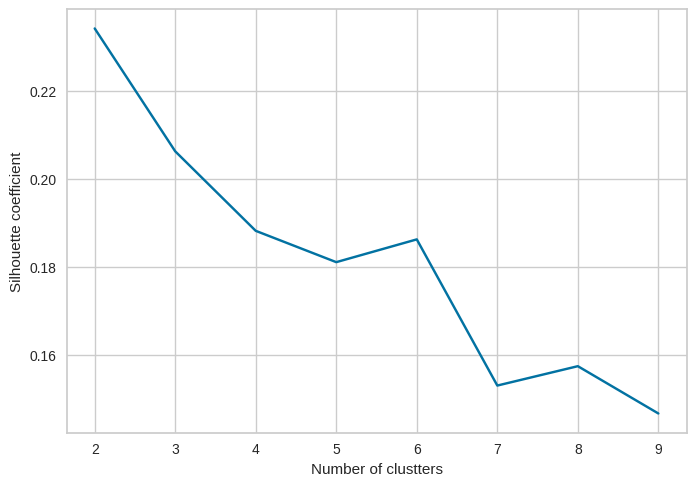

In [ ]:
# Analise grafica do Silhouette Method
silhouette_coeficients = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(pca_df)
  score = silhouette_score(pca_df, kmeans.labels_)
  silhouette_coeficients.append(score)

plt.plot(range(2,10), silhouette_coeficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of clustters")
plt.ylabel("Silhouette coefficient")

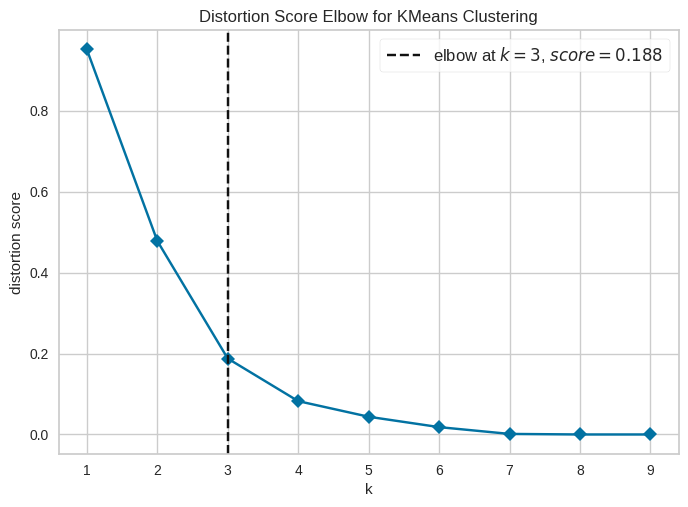

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings = False)
visualizer.fit(pca_df[0:9])
visualizer.show()

Text(0.5, 1.0, 'wine groups')

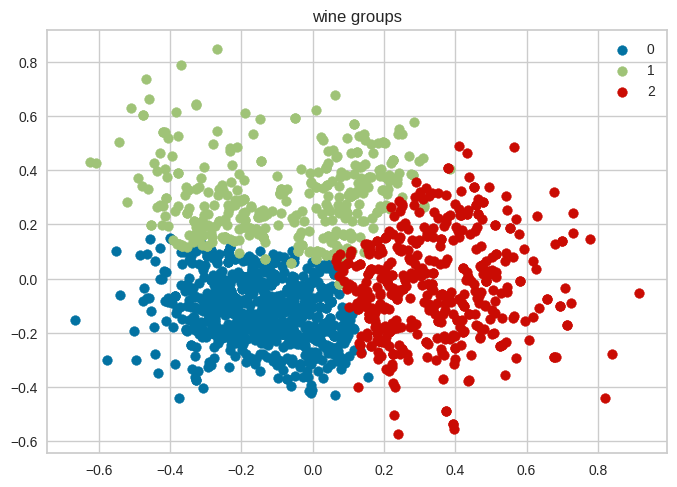

In [ ]:
kmeans= KMeans(n_clusters=3)
label= kmeans.fit_predict(X)
unique_labels= np.unique(label)

for i in unique_labels:
  plt.scatter(X[label==i,0],X[label==i,1],label=i)

plt.legend()
plt.title("wine groups")


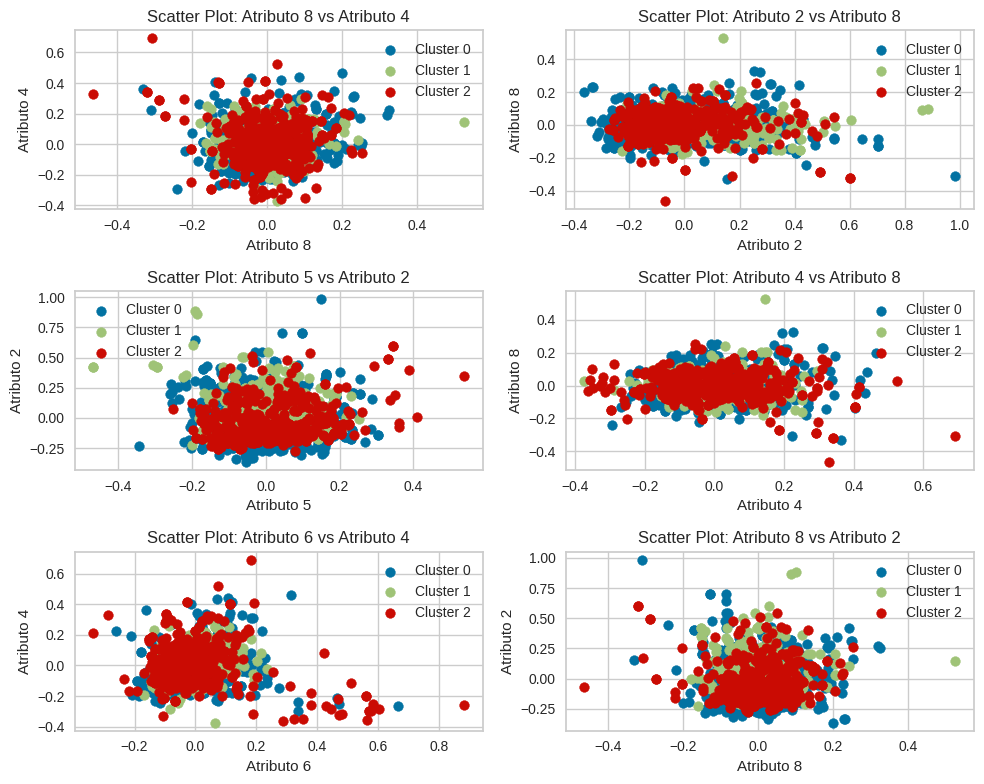

In [ ]:
num_plots = 6  # Número de gráficos de dispersão a serem gerados
num_attributes = 9  # Número total de atributos


plt.figure(figsize=(10, 8))  # Tamanho da figura ajustável

for plot_idx in range(num_plots):
    # Escolher aleatoriamente dois índices de atributos diferentes
    attr1, attr2 = random.sample(range(2,num_attributes), 2)

    plt.subplot(3, 2, plot_idx + 1)

    for i in unique_labels:
        plt.scatter(X[label==i, attr1], X[label==i, attr2], label=f'Cluster {i}')

    plt.xlabel(f'Atributo {attr1}')
    plt.ylabel(f'Atributo {attr2}')
    plt.title(f'Scatter Plot: Atributo {attr1} vs Atributo {attr2}')
    plt.legend()

plt.tight_layout()
plt.show()

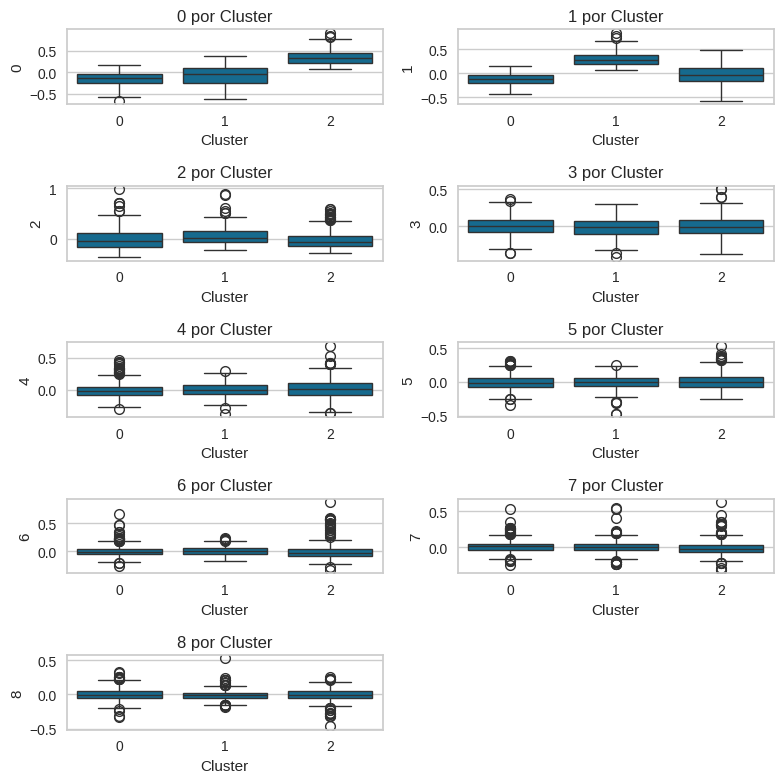

In [ ]:
# Adicionar 'label' como uma coluna ao DataFrame
pca_df['label'] = label

# Plotar boxplots para cada atributo por cluster
plt.figure(figsize=(8, 8))
for i, col in enumerate(pca_df.columns[:9]):  # Excluir a coluna 'label' da iteração
    plt.subplot(5, 2, i + 1)  # 4 linhas, 3 colunas, posição atual
    sns.boxplot(x='label', y=col, data=pca_df)
    plt.title(f'{col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

pca_df = pca_df.drop(labels=['label'], axis=1)